In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/kaggle/input/census-income-dataset/census-income_ (1).csv",skipinitialspace = True)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Unnamed: 14       0
dtype: int64

In [6]:
data.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
21645,47,Private,32509,Some-college,10,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
1112,37,State-gov,60227,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,38,United-States,<=50K
18173,45,Self-emp-not-inc,123088,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
26149,40,Private,174395,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
25156,40,Self-emp-not-inc,165108,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,England,<=50K


In [7]:
data = data.replace('?',np.nan)

In [8]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Unnamed: 14          0
dtype: int64

In [9]:
data.shape

(32561, 15)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  Unnamed: 14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
data = data.rename(columns = {'Unnamed: 14':'AnnualIncome'})

In [12]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,AnnualIncome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
data = data.dropna()

In [14]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
AnnualIncome      0
dtype: int64

In [15]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
census_ed = data[['education']]
census_ed.head()

,education
0,Bachelors
1,Bachelors
2,HS-grad
3,11th
4,Bachelors


In [17]:
census_seq = data.loc[:,'age':'relationship']
census_seq.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife


In [18]:
census_col = data.iloc[:,[4,7,10]]
census_col.head()


,education-num,relationship,capital-gain
0,13,Not-in-family,2174
1,13,Husband,0
2,9,Not-in-family,0
3,7,Husband,0
4,13,Wife,0


In [19]:
data.workclass.value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [20]:
data.sex.value_counts()

Male      20380
Female     9782
Name: sex, dtype: int64

In [21]:
male_gov = data[(data['sex']=='Male')&(data['workclass']=='State-gov')]
male_gov.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,AnnualIncome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K


In [22]:
census_us = data[(data['age']==39)& ((data['education']=='Bachelors')|(data['native-country']=='United-States'))]
census_us.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,AnnualIncome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
129,39,Private,365739,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
166,39,Federal-gov,235485,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,42,United-States,<=50K
320,39,Self-emp-not-inc,174308,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [23]:
census_200 = data.sample(200)
census_200.shape

(200, 15)

In [24]:
data.groupby('workclass')['capital-gain'].mean()

workclass
Federal-gov          832.321315
Local-gov            829.230285
Private              879.858207
Self-emp-inc        4810.746741
Self-emp-not-inc    1913.134454
State-gov            684.306489
Without-pay          487.857143
Name: capital-gain, dtype: float64

In [25]:
bardata = data.groupby('relationship')['sex'].value_counts(normalize = True).mul(100).round(2).unstack()

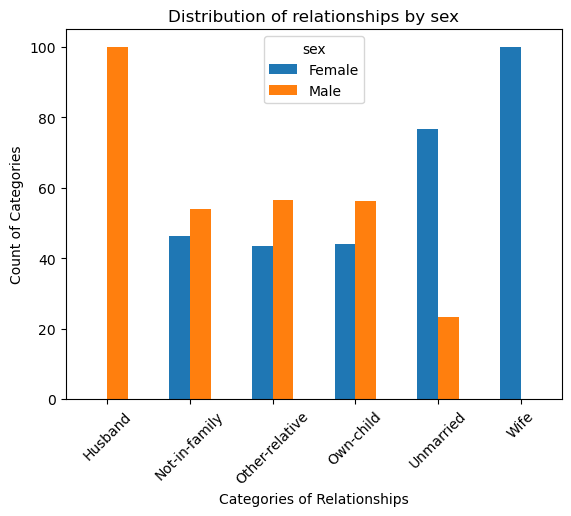

In [26]:
bardata.plot(kind = 'bar')
plt.xlabel('Categories of Relationships')
plt.ylabel('Count of Categories')
plt.xticks(rotation = 45)
plt.title('Distribution of relationships by sex')
plt.show()

In [27]:
bardata1 = data.groupby('relationship')['race'].value_counts(normalize = True).mul(100).round(2).unstack()

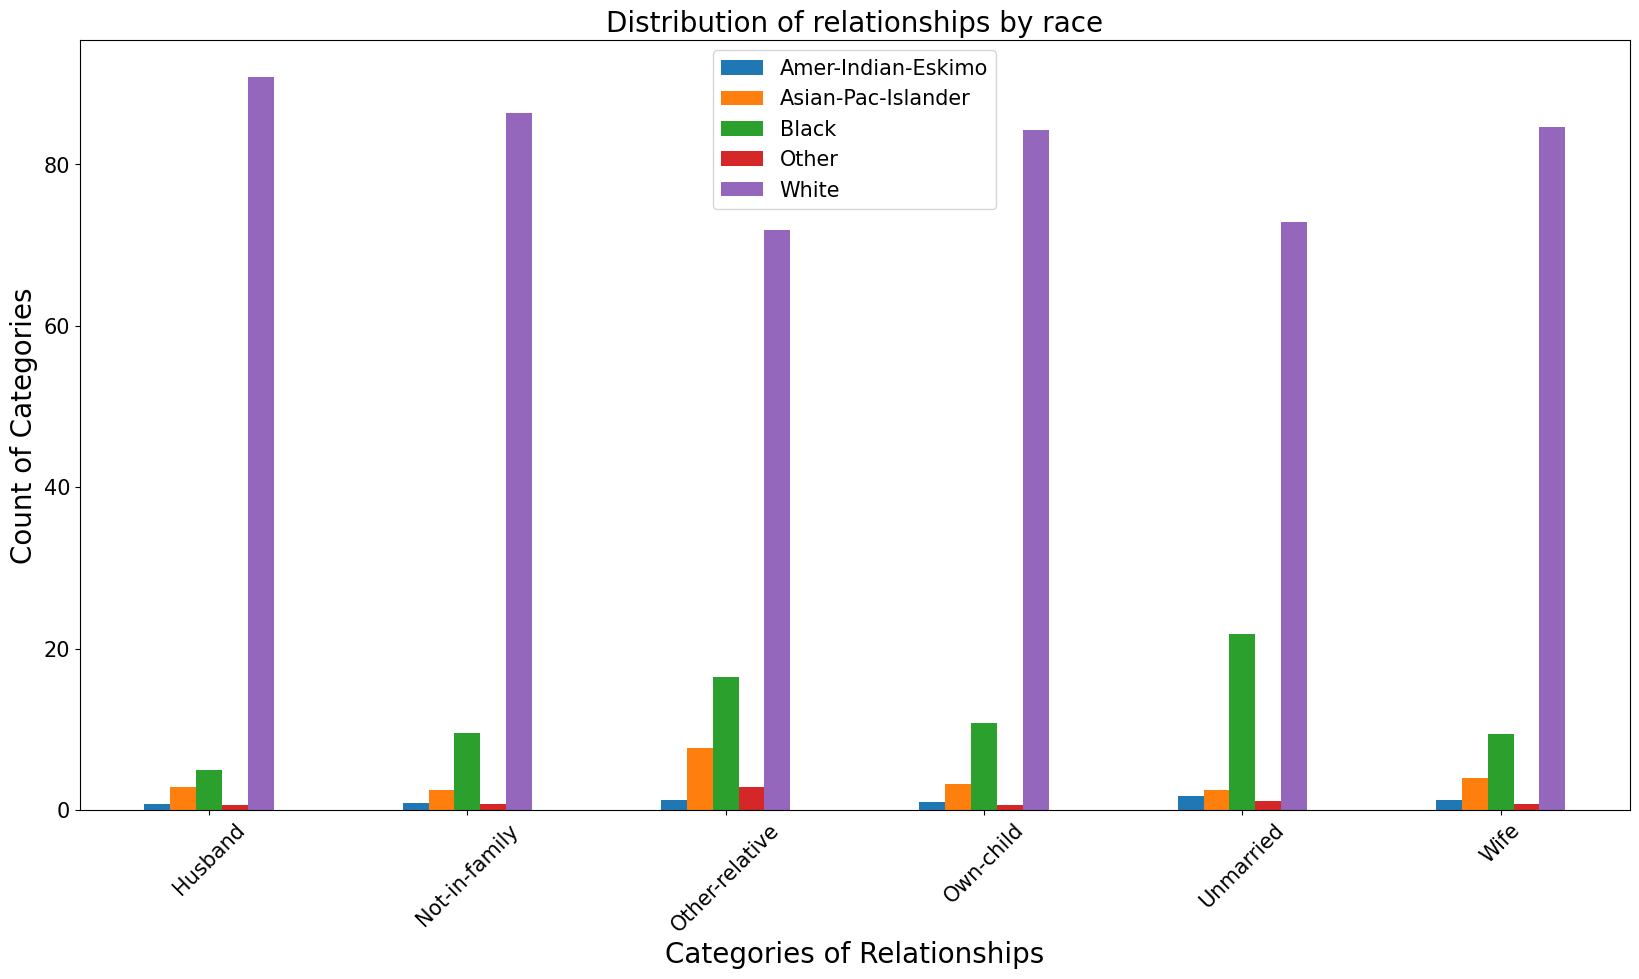

In [28]:
bardata1.plot(kind = 'bar',figsize = (20,10))
plt.xlabel('Categories of Relationships',fontsize = 20)
plt.ylabel('Count of Categories',fontsize = 20)
plt.xticks(fontsize = 15,rotation = 45)
plt.yticks(fontsize = 15)
plt.title('Distribution of relationships by race',fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

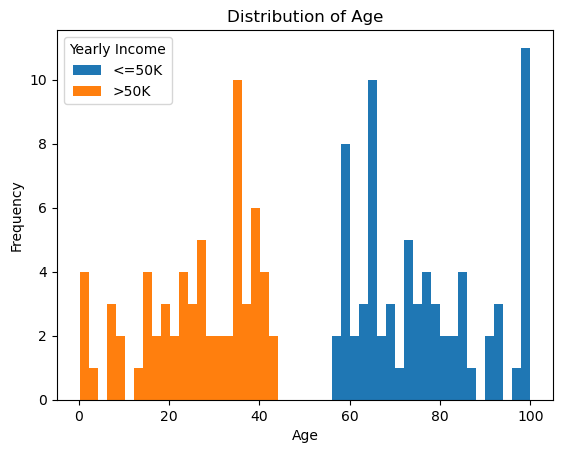

In [29]:
histdata = data.groupby('age')['AnnualIncome'].value_counts(normalize=True).mul(100).round(2).unstack()
histdata.plot(kind='hist',bins = 50)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.legend(title='Yearly Income')
plt.show()


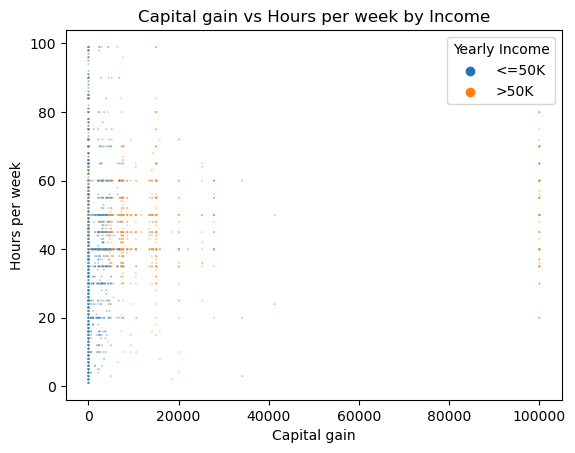

In [30]:
sns.scatterplot(x = data['capital-gain'],y = data['hours-per-week'], hue = data['AnnualIncome'],
                s = 2, alpha = 0.4)
plt.xlabel("Capital gain")
plt.ylabel("Hours per week")
plt.title("Capital gain vs Hours per week by Income")
plt.legend(title = "Yearly Income")
plt.show()


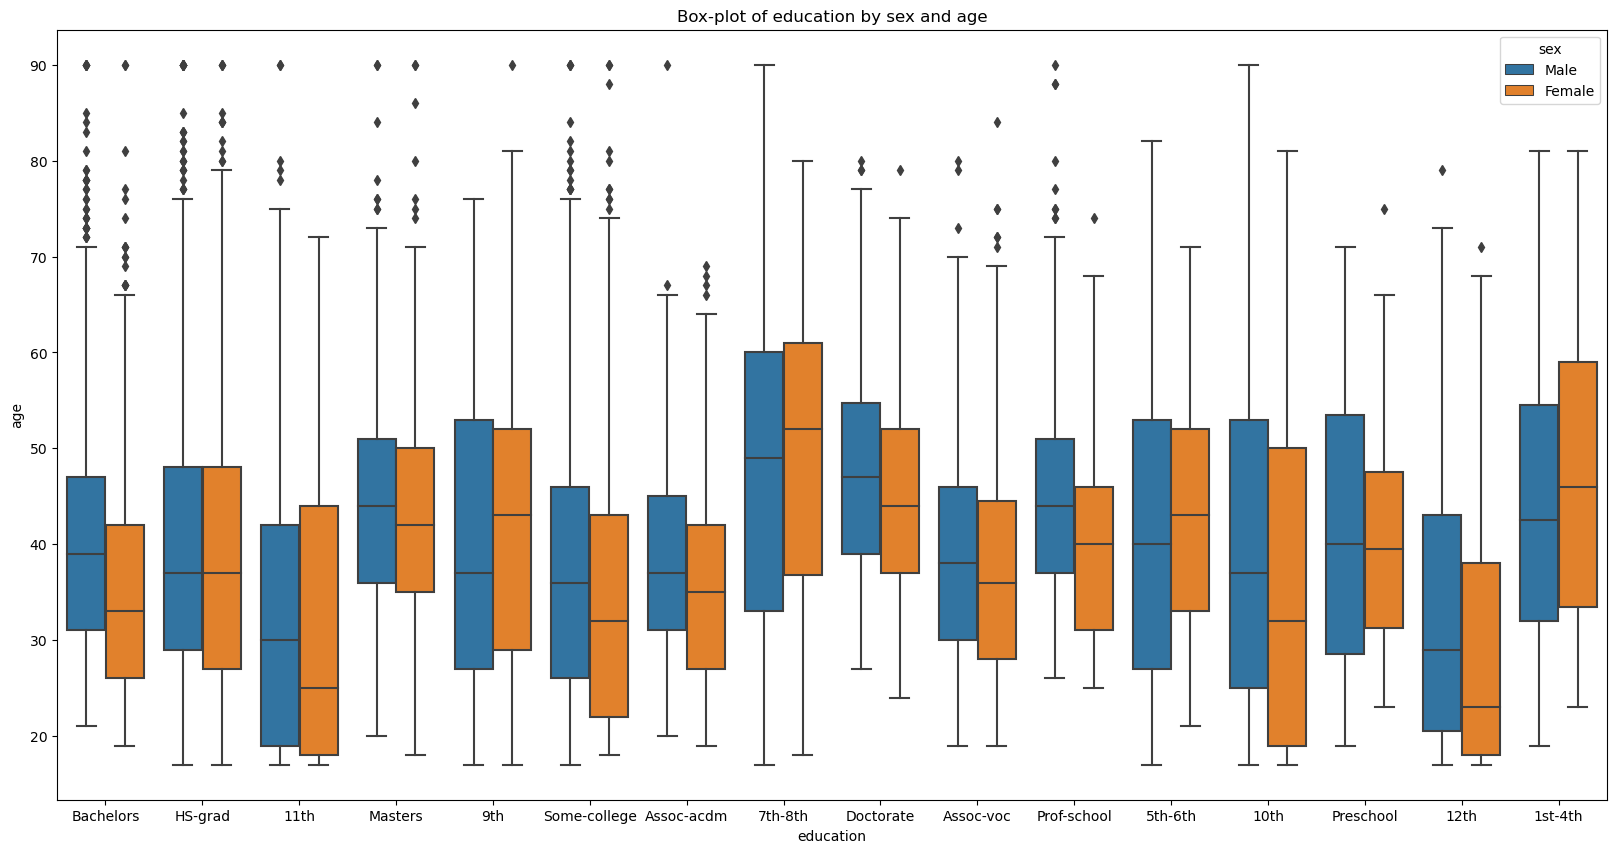

In [31]:
fig,ax = plt.subplots(figsize = (20,10))
sns.boxplot(x = data['education'], y = data['age'], hue = data['sex'])
plt.title("Box-plot of education by sex and age")
plt.show()

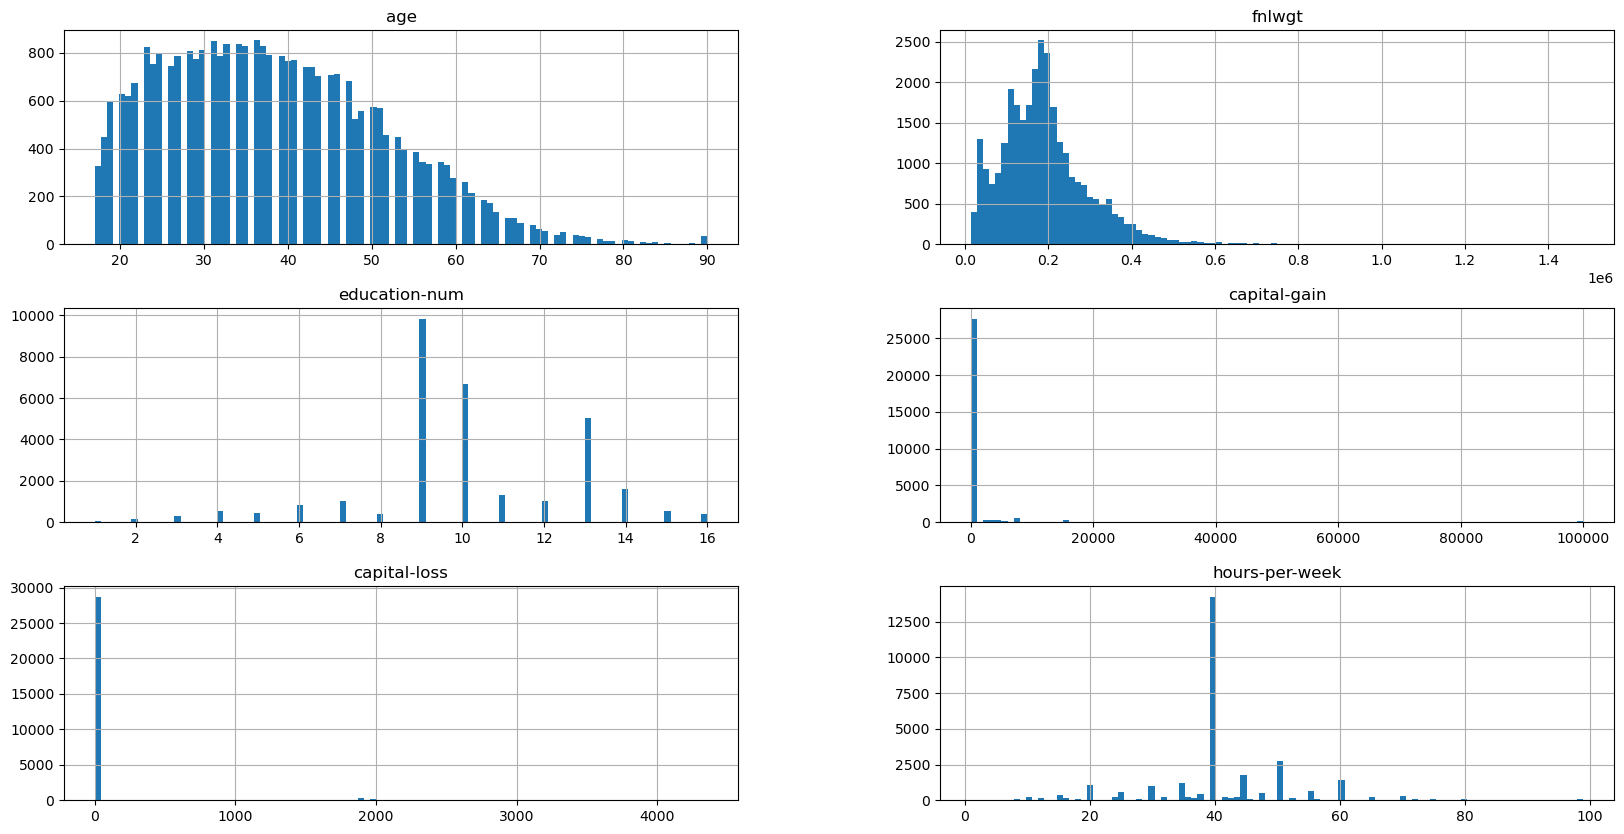

In [32]:
data.hist(bins = 100,figsize = (20,10))
plt.show()

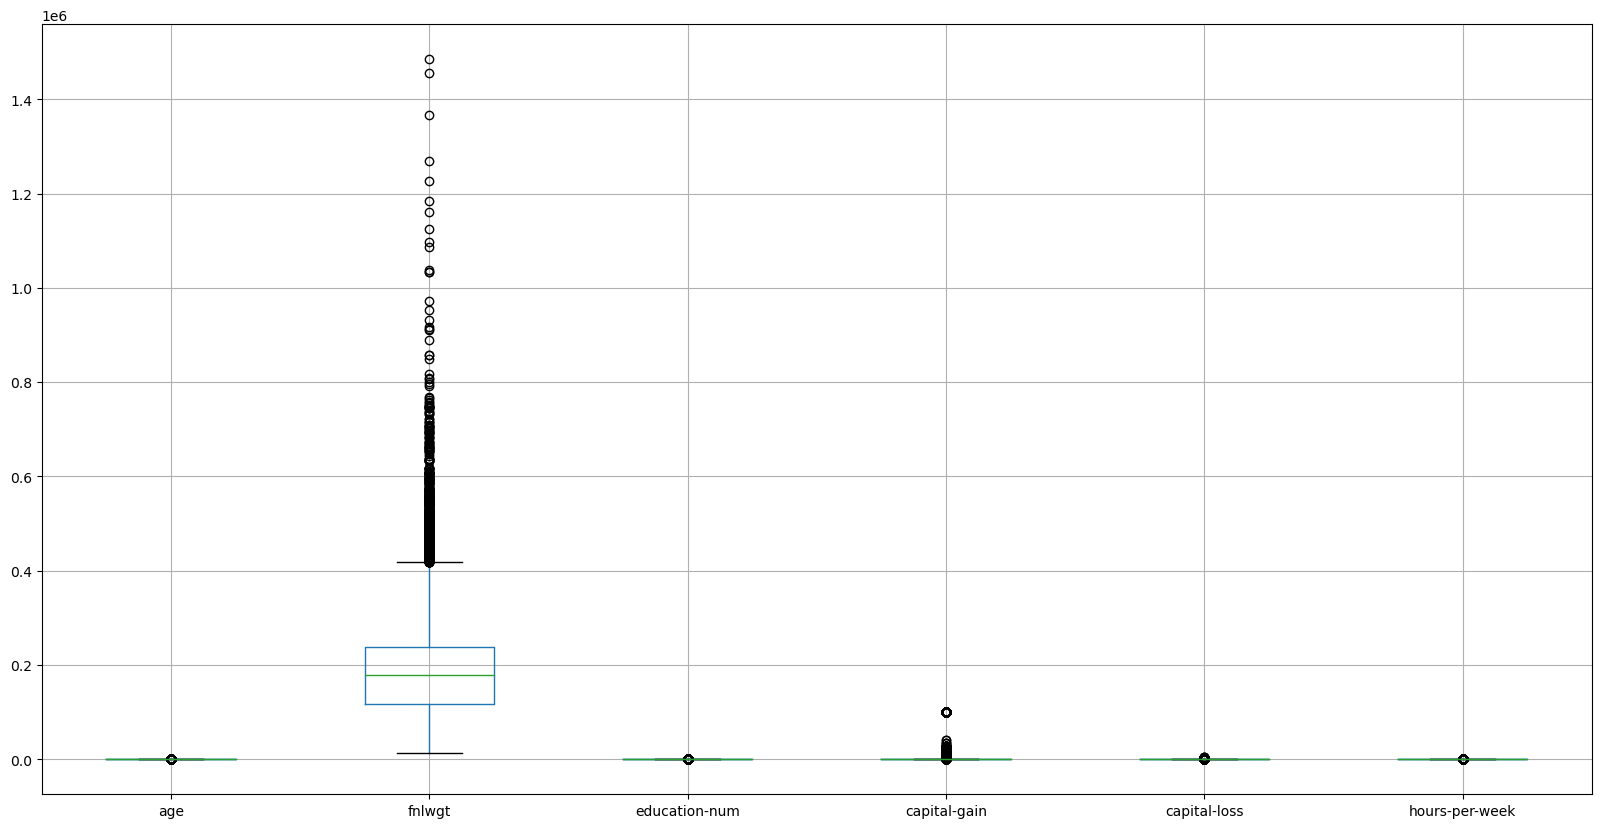

In [33]:
data.boxplot(figsize = (20,10))
plt.show()

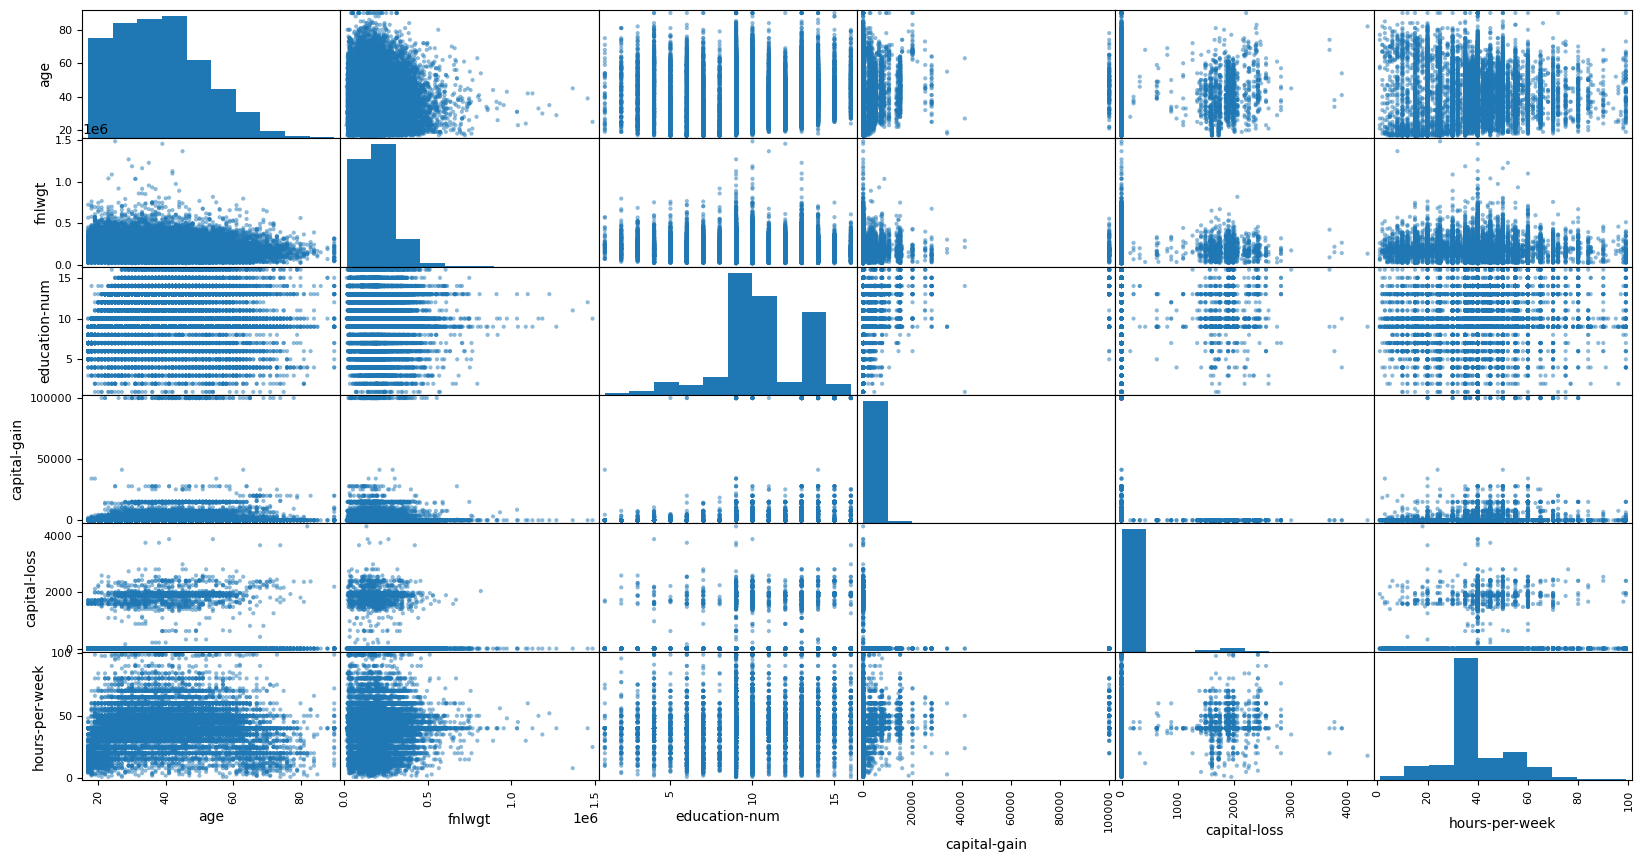

In [34]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize = (20,10))
plt.show()

In [35]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'AnnualIncome'],
      dtype='object')

In [36]:
categorical = []
numerical = []

for col in data.columns:
    if data[col].dtypes == 'object':
        categorical.append(col)
    else:
        numerical.append(col)
        

In [37]:
categorical_data = data[categorical]
categorical_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,AnnualIncome
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [38]:
numerical_data = data[numerical]
numerical_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [40]:
for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])

In [41]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,AnnualIncome
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


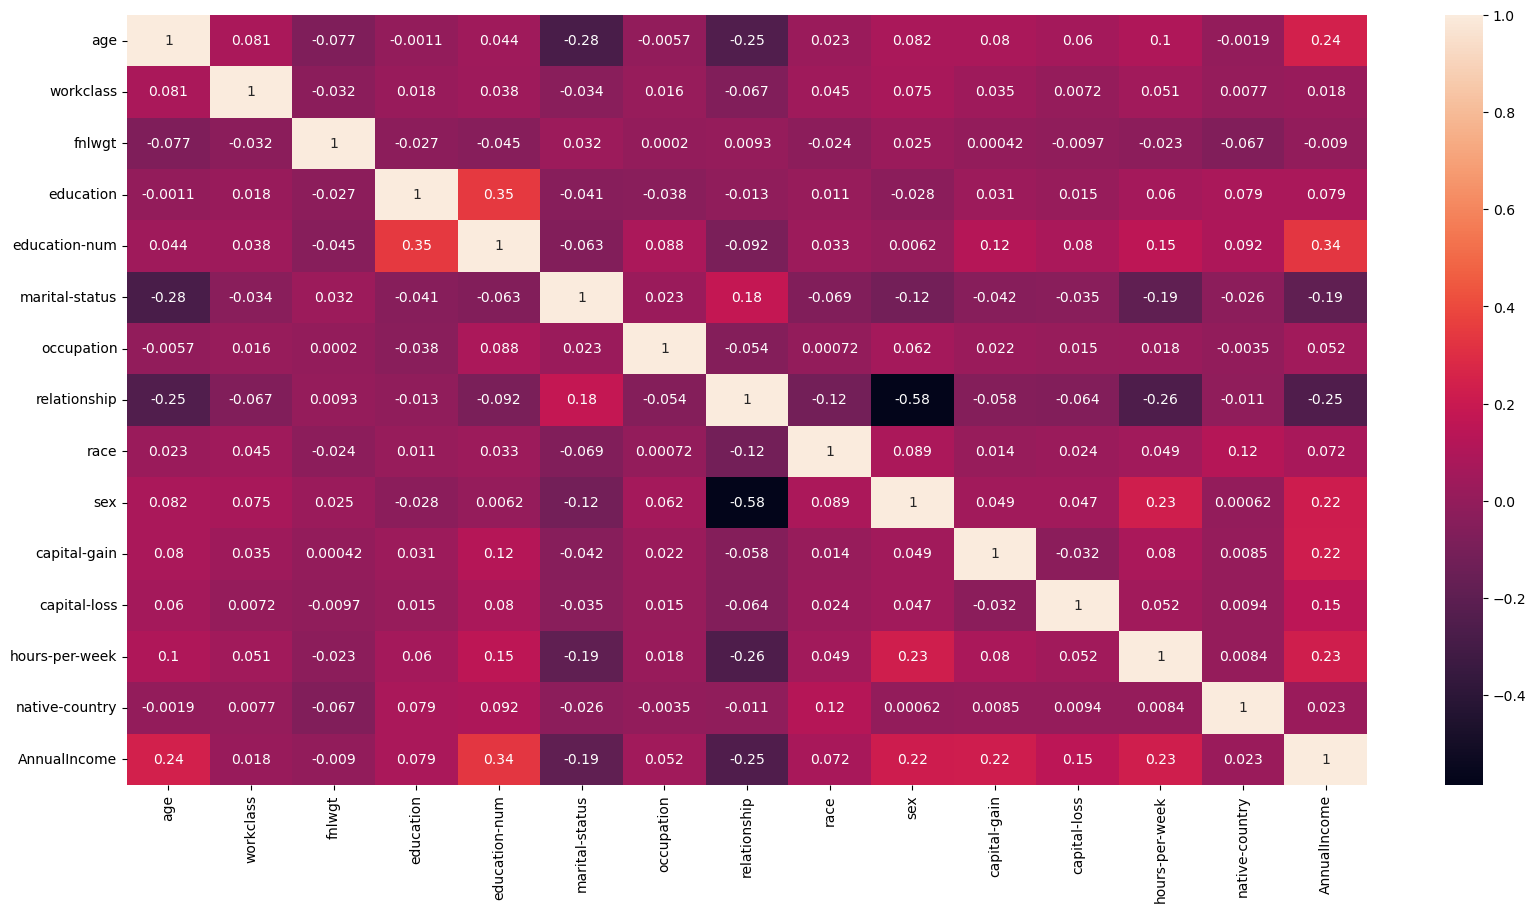

In [42]:
fig,ax = plt.subplots(figsize = (20,10))
data_corr = data.corr()
sns.heatmap(data_corr, annot = True)
plt.show()

In [43]:
data_corr['AnnualIncome'].sort_values(ascending = False)

AnnualIncome      1.000000
education-num     0.335286
age               0.241998
hours-per-week    0.229480
capital-gain      0.221196
sex               0.216699
capital-loss      0.150053
education         0.078987
race              0.071658
occupation        0.051577
native-country    0.023268
workclass         0.018044
fnlwgt           -0.008957
marital-status   -0.193518
relationship     -0.251003
Name: AnnualIncome, dtype: float64

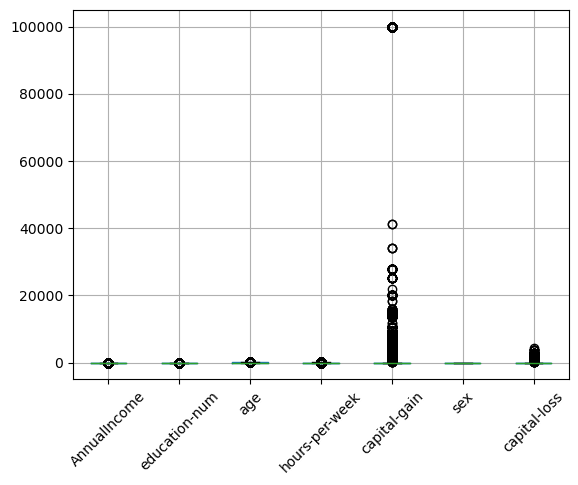

In [44]:
attributes = ['AnnualIncome','education-num','age','hours-per-week','capital-gain','sex','capital-loss']
data[attributes].boxplot()
plt.xticks(rotation = 45)
plt.show()

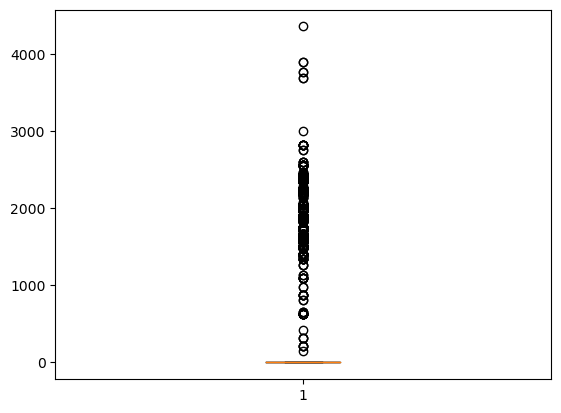

In [45]:
plt.boxplot(data = data,x = data['capital-loss'])
plt.show()

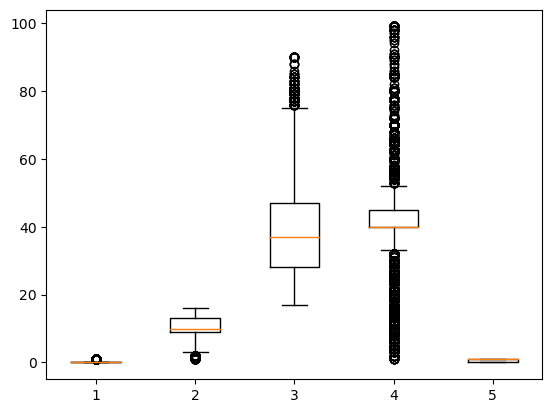

In [46]:
plt.boxplot(data = data,x = (data['AnnualIncome'],data['education-num'],data['age'],
                            data['hours-per-week'],data['sex']))
plt.show()

In [47]:
y = data[['hours-per-week']]
x = data[['education']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared = False)

12.203139123885798

In [49]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(solver = 'liblinear')
x = data[['occupation']]
y = data[['AnnualIncome']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35)
LogReg.fit(x_train,y_train)
y_pred = LogReg.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7541915316851379

In [50]:
from sklearn.metrics import confusion_matrix, plot_roc_curve

In [51]:
confusion_matrix(y_test,y_pred)

array([[7962,    0],
       [2595,    0]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


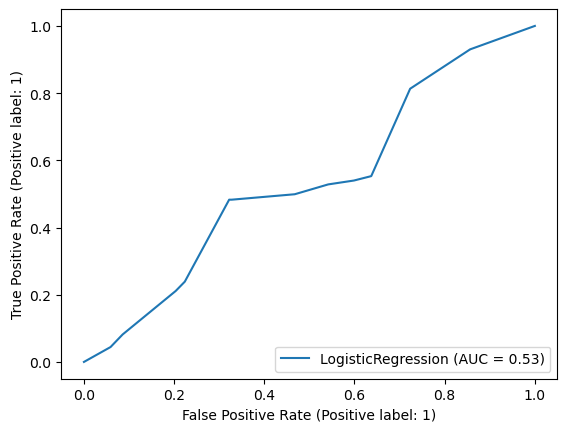

In [52]:
plot_roc_curve(LogReg,x_test,y_test)

In [53]:
MultiLogReg = LogisticRegression(solver = 'liblinear')
x = data[['age','workclass','education']]
y = data[['AnnualIncome']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
MultiLogReg.fit(x_train,y_train)
y_pred = MultiLogReg.predict(x_test)
accuracy_score(y_test,y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7314768771755346

In [54]:
confusion_matrix(y_test,y_pred)

array([[4381,  125],
       [1495,   32]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


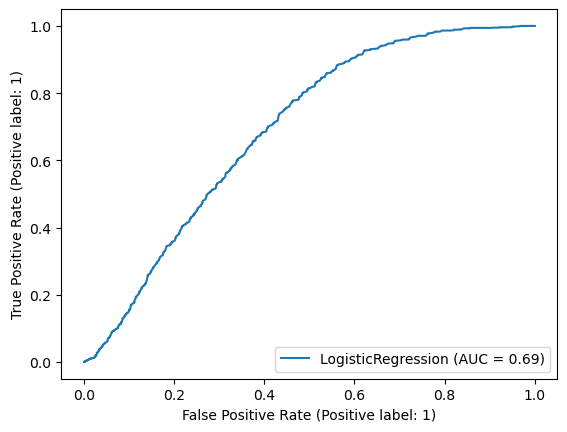

In [55]:
plot_roc_curve(MultiLogReg,x_test,y_test)

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [57]:
tree = DecisionTreeClassifier()
x = data.drop('AnnualIncome',axis = 1)
y = data[['AnnualIncome']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.8058348988838546

In [58]:
confusion_matrix(y_test,y_pred)

array([[5822,  938],
       [ 819, 1470]])

In [59]:
ensemble = RandomForestClassifier(n_estimators = 300)
x = data.drop('AnnualIncome',axis = 1)
y = data[['AnnualIncome']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
ensemble.fit(x_train,y_train)
y_pred = ensemble.predict(x_test)
accuracy_score(y_test,y_pred)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8480026520802254

In [60]:
confusion_matrix(y_test,y_pred)

array([[4188,  353],
       [ 564,  928]])